In [1]:
#Punto 1

def lcs(a, b):
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    # read the substring out from the matrix
    result = ""
    x, y = len(a), len(b)
    while x != 0 and y != 0:
        if lengths[x][y] == lengths[x-1][y]:
            x -= 1
        elif lengths[x][y] == lengths[x][y-1]:
            y -= 1
        else:
            assert a[x-1] == b[y-1]
            result = a[x-1] + result
            x -= 1
            y -= 1
    return result

lcs('ABCBDAB','BDCABA')


'BCBA'

In [1]:
# Programa recurviso para encontrar el minimo numero
# Operaciones para la conversion del string1 y string2
def editDistance( str1, str2, m , n):
 
    # Si el primer string es vacio, la unica solucion es
    # insertar todos los caracteres del segundo string en el primero
    if m==0:
         return n
 
    # Si el segundo string es vacio, la unica solucion es remover todos los caracteres del primer String
    if n==0:
        return m
 
    # Si los ultimos caracteres de las dos cadenas son iguales,
    # No se puede hacer mucho. Ignorar los ultimos caracteres 
    # y sacar la cuenta para los strings restantes.
    if str1[m-1]==str2[n-1]:
        return editDistance(str1,str2,m-1,n-1)
 
    # Si los ultimos caracteres no son iguales, se consideran tres
    # operaciones (Insertar, remover, y remplazar) en el ultimo caracter de la primera cadena, 
    # recursivamente se calcula el costo computacional de cada una de las operaciones
    # y se toma el menor valor de los tres.
    return 1 + min(editDistance(str1, str2, m, n-1), editDistance(str1, str2, m-1, n),    editDistance(str1, str2, m-1, n-1))

str1="Ejemplo"
str2="Prueba"
print ("El minimo costo de edicion es:", editDistance(str1, str2, len(str1), len(str2)))
    

('El minimo costo de edicion es:', 7)


#3

Llamaremos T[i,j] a la tarifa para ir del embarcadero i al j (directo). Estos valores
se almacenarán en una matriz triangular superior de orden n, siendo n el número de
embarcaderos.
El problema puede resolverse mediante Programación Dinámica ya que para
calcular el coste óptimo para ir del embarcadero i al j podemos hacerlo de forma
recurrente, suponiendo que la primera parada la realizamos en un embarcadero
intermedio k (i < k ≤ j):
C(i,j) = T(i,k) + C(k,j).
En esta ecuación se contempla el viaje directo, que corresponde al caso en el
que k coincide con j. Esta ecuación verifica también que la solución buscada C(i,j)
satisface el principio del óptimo, pues el coste C(k,j), que forma parte de la
solución, ha de ser, a su vez, óptimo. Podemos plantear entonces la siguiente expresión de la solución:

C (i,j) = { 0 si i=j 
            
      Min{T(i,k) + C(k,j)} si i<j
            
La idea de esta segunda expresión surge al observar que en cualquiera de los
trayectos siempre existe un primer salto inicial óptimo.

Para resolverla según la técnica de Programación Dinámica, hace falta utilizar
una estructura para almacenar resultados intermedios y evitar la repetición de los
cálculos. La estructura que usaremos es una matriz triangular de costes C[i,j], que
iremos rellenando por diagonales mediante el procedimiento que hemos
denominado Costes. La solución al problema es la propia tabla, y sus valores C[i,j]
indican el coste óptimo para ir del embarcadero i al j.

    CONST MAXEMBARCADEROS = ...;
    TYPE MATRIZ=ARRAY[1..MAXEMBARCADEROS],[1..MAXEMBARCADEROS] OF CARDINAL;
    PROCEDURE Costes(VAR C:MATRIZ;n:CARDINAL);
    VAR i, diagonal:CARDINAL;
    BEGIN
    FOR i:=1 TO n DO C[i,i]:=0 END; (* condiciones iniciales *)
    FOR diagonal:=1 TO n-1 DO
    FOR i:=1 TO n-diagonal DO
    C[i,i+diagonal]:=Min(C,i,i+diagonal)
    END
    END
    END Costes;

Dicho procedimiento utiliza la siguiente función, que permite calcular la
expresión del mínimo que aparece en la ecuación en recurrencia:

    PROCEDURE Min(VAR C:MATRIZ; i,j:CARDINAL):CARDINAL;
    VAR k,min:CARDINAL;
    BEGIN
    min:=MAX(CARDINAL);
    FOR k:=i+1 TO j DO
    min:=Min2(min,T[i,k] + C[k,j])
    END;
    RETURN min
    END Min;

La función Min2 es la que calcula el mínimo de dos números naturales. Es
importante observar que esta función, por la forma en que se va rellenando la
matriz C, sólo hace uso de los elementos calculados hasta el momento.
La complejidad del algoritmo es de orden O(n3), pues está compuesto por dos
bucles anidados de tamaño n, que contienen la llamada a una función de orden
O(n), la que calcula el mínimo.

Fuente: http://www.lcc.uma.es/~av/Libro/CAP5.pdf


22
[4.000000000115023e-06, 3.999999999892978e-06, 8.999999999925734e-06, 1.0999999999983245e-05, 2.4000000000024002e-05, 4.399999999993298e-05, 7.899999999994023e-05, 0.00016300000000013526]
Implementación de arriba hacia abajo con memorización
22
[3.999999999892978e-06, 8.999999999925734e-06, 8.999999999925734e-06, 1.0000000000065512e-05, 1.6999999999933735e-05, 2.2999999999884224e-05, 2.8999999999834714e-05, 3.4000000000089514e-05]
Implementación abajo hacia arriba (bottom-up)
22
[3.999999999892978e-06, 5.000000000032756e-06, 5.000000000032756e-06, 5.000000000032756e-06, 7.000000000090267e-06, 9.000000000147779e-06, 1.2000000000123023e-05, 1.3000000000040757e-05]
Cortes
[2, 6]
22


IndexError: list index out of range

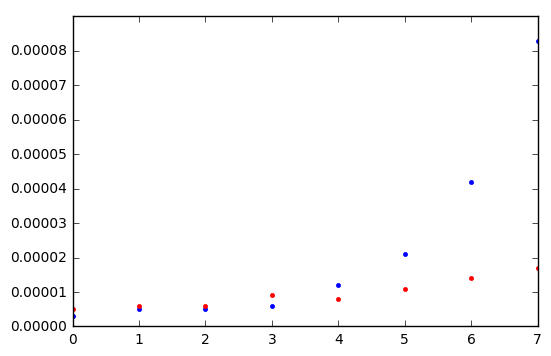

In [1]:
#rod-cutting

import time
import random as rnd
import math
import numpy as np
import pylab as pl
import math
import numpy as np
import pylab as pl
%matplotlib inline



def cut_rodR(p, n):
    if n==0:
        return 0
    q = float('-inf')
    for i in range(n):
        #print i
        q = max(q, p[i] + cut_rodR(p, n-1-i))
    return q
p = [1,5,8,9,10,17,17,20,24,30]
sol = cut_rodR(p,8)
print (sol)

def time_analysis_cut_rodR(n):
    results = []
    for i in range(n):
        t_inicial=time.clock()
        cut_rodR(p, i)
        t_final= time.clock()
        results.append(t_final-t_inicial)
    return results

print (time_analysis_cut_rodR(8))
       
print("Implementación de arriba hacia abajo con memorización")

def memo_cut_rodTD(p, n):
    r = [-1] * (n+1)
    return memo_cut_rodTD_aux(p,n,r)

def memo_cut_rodTD_aux(p,n,r):
    if r[n] >= 0:
        return r[n]
    if n == 0:
        q = 0
    else:
        q = float('-inf')
        for i in range(1,n+1):
            q = max(q, p[i-1]+memo_cut_rodTD_aux(p,n-i,r))
    r[n]=q
    return q
       
sol = memo_cut_rodTD(p,8)
print (sol)
       

def time_analysis_cut_rodTD(n):
    results = []
    for i in range(n):
        t_inicial=time.clock()
        memo_cut_rodTD(p, i)
        t_final= time.clock()
        results.append(t_final-t_inicial)
    return results

print (time_analysis_cut_rodTD(8))



print("Implementación abajo hacia arriba (bottom-up)")
       
def memo_cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):            
            q = max(q, p[i-1]+r[j-i])
        r[j] = q
    return r[n]
       
sol = memo_cut_rodBU(p,8)
print (sol)
       

def time_analysis_cut_rodBU(n):
    results = []
    for i in range(n):
        t_inicial=time.clock()
        memo_cut_rodBU(p, i)
        t_final= time.clock()
        results.append(t_final-t_inicial)
    return results

print (time_analysis_cut_rodBU(8))
       
print("Cortes")
       
def mostrar_secuencia(lista,n,contador):
    aux=lista[n-1]
    aux2=[]
    if(0 in aux):
        return aux;
    else:
        aux2.insert(contador,mostrar_secuencia(lista,int(aux[0]),contador))
        contador=contador+1
        aux2.insert(contador,mostrar_secuencia(lista,int(aux[1]),contador))
        
        posva=0
        listaF=[]
        for i in range(0,len(aux2)):
            for j in range(0,2):
                if(aux2[i][j]!=0):
                    listaF.insert(posva,int(aux2[i][j]))
                    posva=posva+1
        
    return listaF

def memo_cut_rodBU(p,n):
    r = [0] * (n+1)
    r[0] = 0
    lista=[]
    
    for j in range(1,n+1):
        auxiliar1=0
        auxiliar2=0
        aux=np.zeros(2)
        q = float('-inf')
        for i in range(1,j+1): 
            if(q<p[i-1]+r[j-i]):
                auxiliar1=i
                auxiliar2=j-i
            
            
            q = max(q, p[i-1]+r[j-i])
            
            
        r[j] = q
        aux[0]=int(auxiliar1)
        aux[1]=int(auxiliar2)
        
        lista.insert(j,aux)
    aux3=mostrar_secuencia(lista,n,0);
    print(aux3)
    
    return r[n]

sol = memo_cut_rodBU(p,8)
print (sol)
       
pl.clf()
x = np.arange(8)
y = np.array(time_analysis_cut_rodR(8))  #primer algoritmo
pl.plot(x, y, 'k.',color='blue')
x = np.arange(8)
y = np.array(time_analysis_cut_rodTD(8)) #Top down
pl.plot(x, y, 'k.',color='red')
x = np.arange(8)
y = np.array(time_analysis_cut_rodBU(8)) #B Up
pl.plot(x, y, 'k.',color='green')